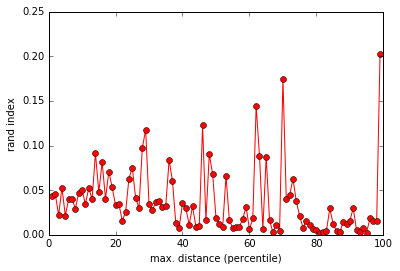

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt("/Users/telmo/projects/ghostborders/paris_dist_sequence.csv", names=['per', 'dist'], skip_header=0, delimiter=',')
#plt.figure(figsize=(15, 10))
plt.plot(data['per'], data['dist'], 'ro-')
plt.xlabel('max. distance (percentile)')
plt.ylabel('rand index')
plt.show()

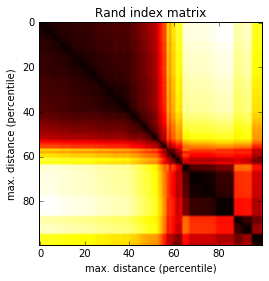

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/ukraine/ukraine_dist_matrix.csv", skip_header=0, delimiter=',')
plt.imshow(data, cmap='hot')
plt.title('Rand index matrix')
plt.xlabel('max. distance (percentile)')
plt.ylabel('max. distance (percentile)')
plt.show()

In [45]:
window = 10

def mean_dist(a, b):
    count = 0.0
    dist = 0.0
    for i in range(a, b):
        for j in range(a, i):
            count += 1.0
            dist += data[i][j]
    if count == 0.0:
        return 0.0
    dist /= count
    return dist

def mean_mean_dist(breaks):
    sum = 0.0
    start = 0
    for b in breaks:
        sum += mean_dist(start, b) * (b - start)
        start = b
    heur = sum / 100.0
    sum += mean_dist(start, 100) * (100 - start)
    mean_mean = sum / 100.0
    return mean_mean, heur

def valid_break(breaks, brk):
    for i in breaks:
        if abs(i - brk) < window:
            return False
    return True

breaks = []
best_best_score = 9999999.9

while True:
    best = []
    best_score = 999999.9
    for i in range(100):
        if valid_break(breaks, i):
            new_breaks = breaks[:]
            new_breaks.append(i)
            score, heur = mean_mean_dist(new_breaks)
            if score < best_score:
                best_score = score
                best = new_breaks
    breaks = best
    if best_score < best_best_score:
        print(best_score)
        print(best)
        best_best_score = best_score
    else:
        break

0.0139118387599
[57]
0.0109612502569
[57, 87]
0.0105804761932
[57, 87, 97]


In [15]:
BASE_DIR = '/Users/telmo/Dropbox/phantomgrenzen/scales-metrics'

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def read_file(region, metric, smooth):
    file_name = '%s-per-%s' % (region, metric)
    if smooth:
        file_name = '%s-smooth' % file_name
    file_path = '%s/%s.csv' % (BASE_DIR, file_name)
    data = np.genfromtxt(file_path, names=['per', 'dist', 'metric'], skip_header=1, delimiter=',')
    return data


def charts(region):
    plt.figure(figsize=(15, 10))
    
    data = read_file(region, 'count', False)
    plt.subplot(2, 3, 1)
    plt.plot(data['per'], data['metric'], 'ro-')
    plt.title('# communities')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('count')

    data = read_file(region, 'entropy', False)
    plt.subplot(2, 3, 2)
    plt.plot(data['per'], data['metric'], 'go-')
    plt.title('Entropy')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('entropy')

    data = read_file(region, 'herfindahl', False)
    plt.subplot(2, 3, 3)
    plt.plot(data['per'], data['metric'], 'bo-')
    plt.title('Herfindahl')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('Herfindahl')

    data = read_file(region, 'count', True)
    plt.subplot(2, 3, 4)
    plt.plot(data['per'], data['metric'], 'ro-')
    plt.title('# communities (smooth)')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('count')

    data = read_file(region, 'entropy', True)
    plt.subplot(2, 3, 5)
    plt.plot(data['per'], data['metric'], 'go-')
    plt.title('Entropy (smooth)')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('entropy')

    data = read_file(region, 'herfindahl', True)
    plt.subplot(2, 3, 6)
    plt.plot(data['per'], data['metric'], 'bo-')
    plt.title('Herfindahl (smooth)')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('Herfindahl')
    
    plt.show()


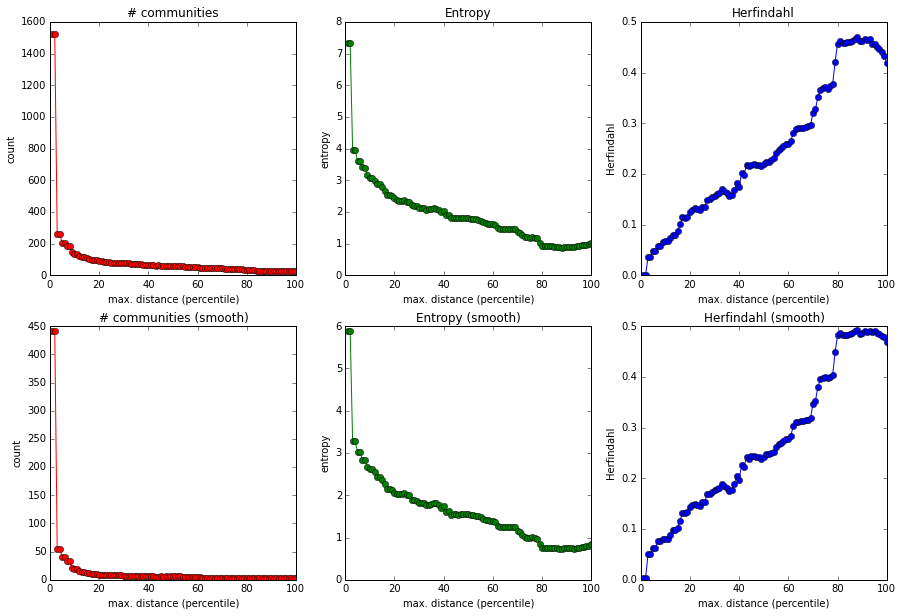

In [17]:
charts('paris')

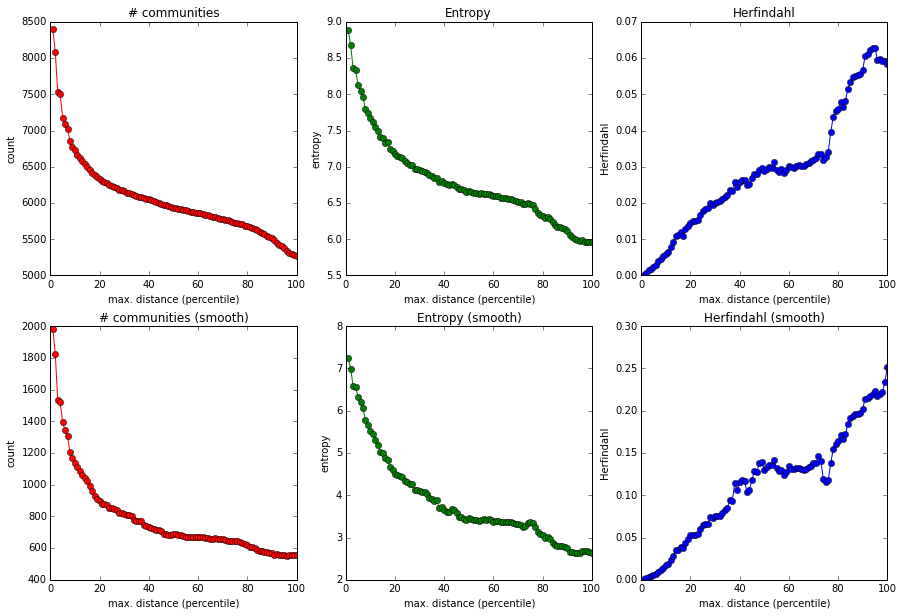

In [16]:
charts('berlin')

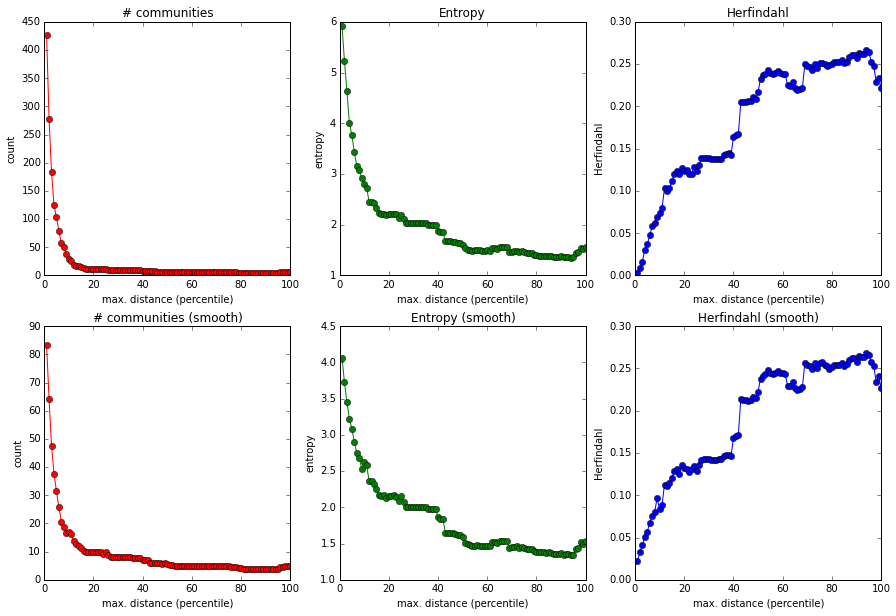

In [18]:
charts('belgium')

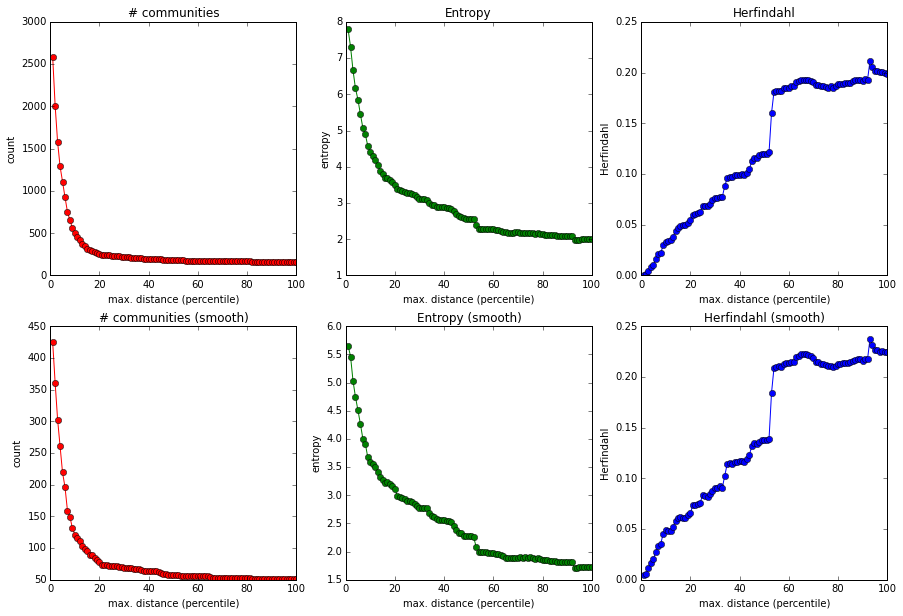

In [23]:
charts('belgium2')

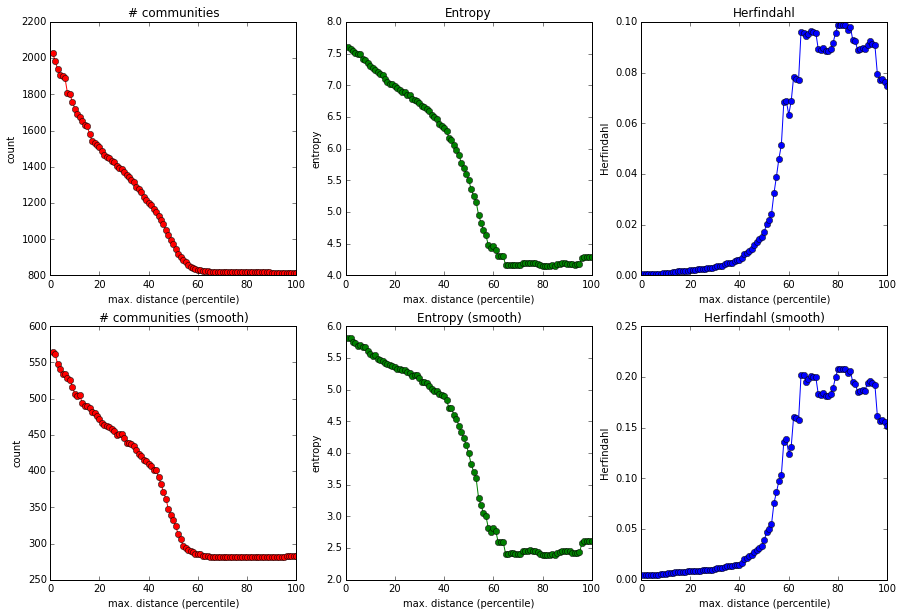

In [19]:
charts('ukraine')

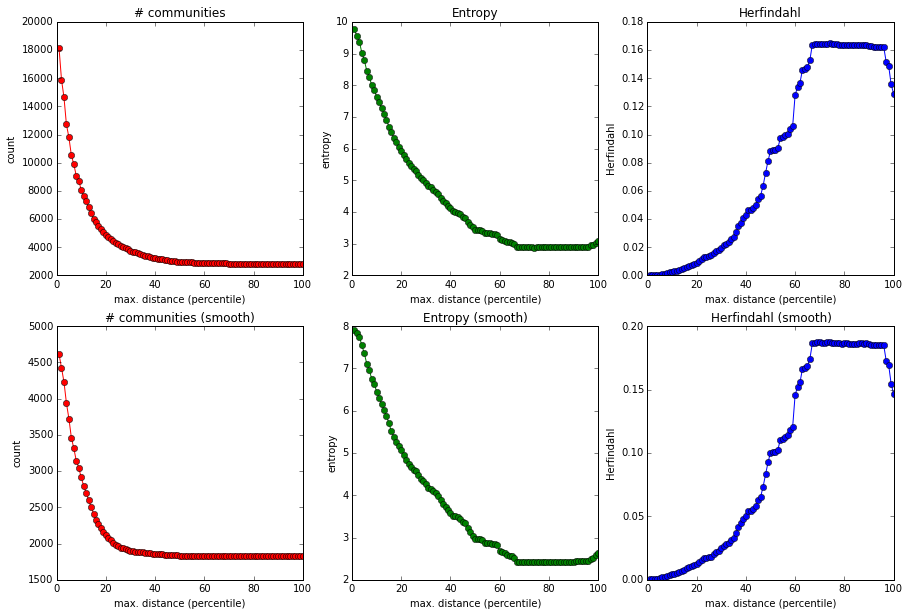

In [20]:
charts('poland')

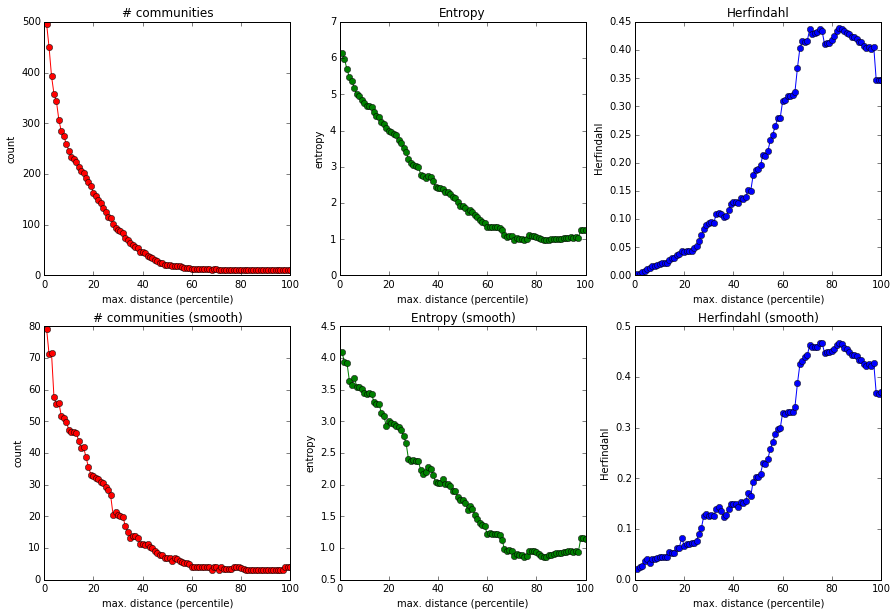

In [21]:
charts('portugal')

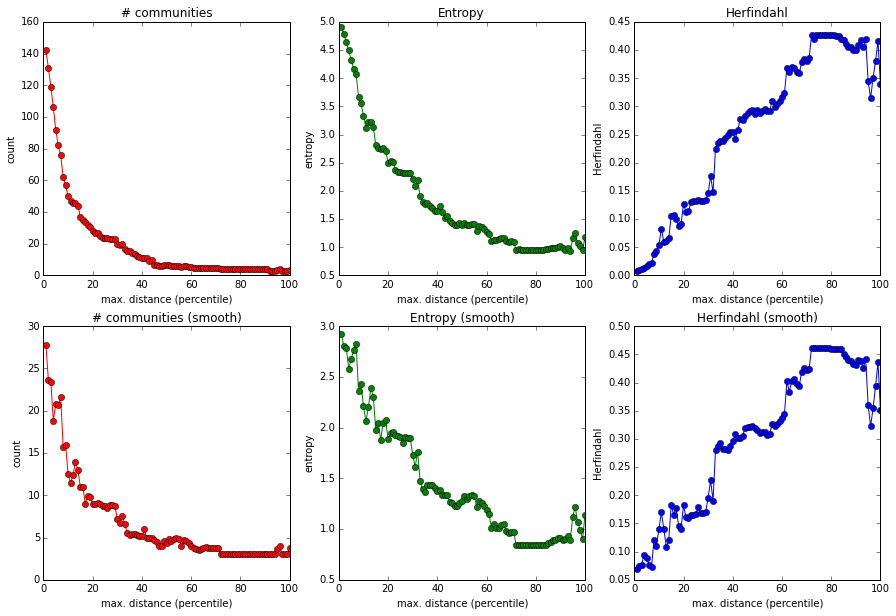

In [22]:
charts('israel')

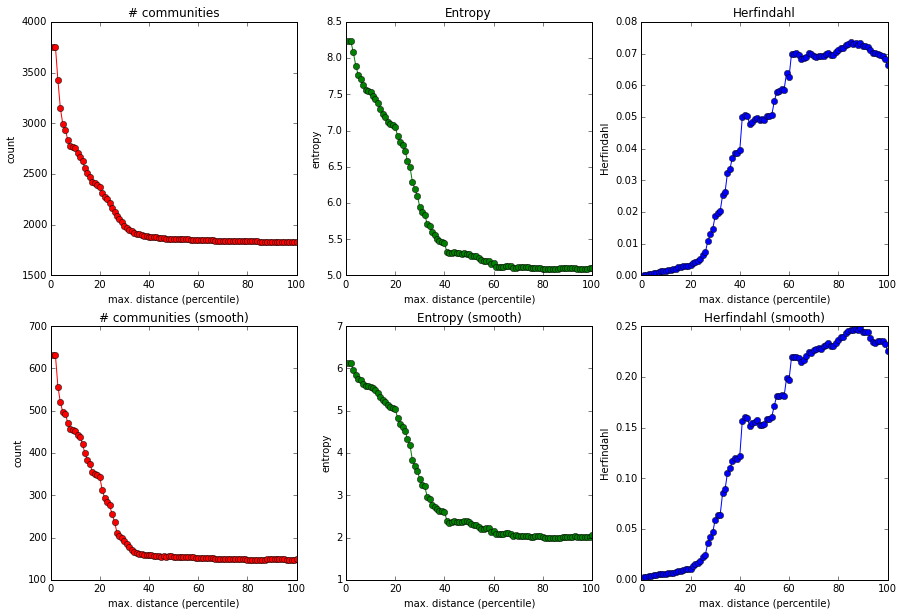

In [24]:
charts('romania')

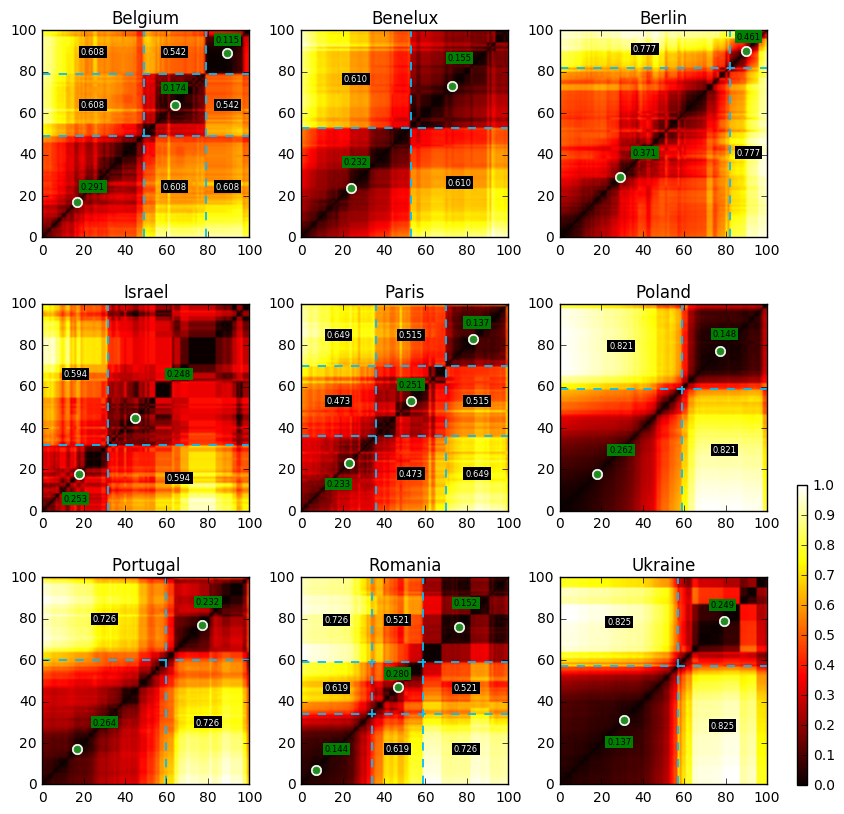

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


def partition(plt, pos):
    plt.axvline(pos, color='deepskyblue', ls='dashed', lw=1.3)
    plt.axhline(pos, color='deepskyblue', ls='dashed', lw=1.3)

    
def scale(plt, pos):
    plt.plot(pos - 1, pos - 1, 'b.', markersize=15, c='white')
    plt.plot(pos - 1, pos - 1, 'b.', markersize=10, c='forestgreen')

    
def mean_label(m, x, y, inner=False):
    fc = 'black'
    color = 'white'
    if inner:
        fc = 'green'
        color = 'black'
    bbox_props = dict(boxstyle="square,pad=0.2", fc=fc, lw=0)
    plt.annotate('%.3f' % m, xy=(x, y), color=color, ha="center", va="center", size=6, bbox=bbox_props)
    

def partition_mean_dist(data, x0, x1, before, after, yoff):
    # print('%s %s %s %s' % (before, x0, x1, after))
    
    acc = 0.
    count = 0.
    for i in range(x0, x1):
        for j in range(x0, i):
            acc += data[i][j]
            count += 1.
    in_dist = acc / count
    
    pos = x0 + ((x1 - x0) / 2.)
    mean_label(in_dist, pos, pos + yoff, True)
    
    if x0 > 0:
        acc = 0.
        count = 0.
        for i in range(x0, x1):
            for j in range(before, x0):
                acc += data[i][j]
                count += 1.
        out_dist = acc / count
        y = before + ((x0 - before) / 2.)
        mean_label(out_dist, pos, y)
        
    if x1 < 100:
        acc = 0.
        count = 0.
        for i in range(x0, x1):
            for j in range(x1, after):
                acc += data[i][j]
                count += 1.
        out_dist = acc / count
        y = x1 + ((after - x1) / 2.)
        mean_label(out_dist, pos, y)
        
    # print('[%s->%s] in: %s; out: %s' % (x0, x1, in_dist, out_dist))


def partition_mean_dists(data, parts, yoffs=(0, 0, 0)):
    # print('***')
    before = 0
    x0 = 0
    for i in range(len(parts)):
        after = 100
        if i > 0:
            x0 = parts[i - 1]
        if i < len(parts) - 1:
            after = parts[i + 1]
        x1 = parts[i]
        partition_mean_dist(data, x0, x1, before, after, yoffs[i])
        before = x0
    partition_mean_dist(data, parts[-1], 100, before, 100, yoffs[len(parts)])
    
    if len(parts) > 1:
        acc = 0.
        count = 0.
        for i in range(parts[-1], 100):
            for j in range(0, parts[-1]):
                acc += data[i][j]
                count += 1.
        out_dist = acc / count
        x = parts[-1] + ((100 - parts[-1]) / 2.)
        y = parts[0] / 2.
        mean_label(out_dist, x, y)
        mean_label(out_dist, y, x)
    

def plot_heatmap(data):
    return plt.imshow(data, cmap='hot')
    # cbar = plt.colorbar(fraction=0.03, pad=.02)
    # cbar.ax.tick_params(labelsize=6) 


def load_data(path):
    data = np.genfromtxt(path, skip_header=0, delimiter=',')
    max_dist = np.max(data)
    data /= max_dist
    return data


fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.25)

# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

data = load_data("/Users/telmo/projects/ghostborders/results/belgium/belgium_dist_matrix.csv")
plt.subplot(gs[0, 0])
plot_heatmap(data)
partition(plt, 49)
partition(plt, 79)
# print('[belgium]')
partition_mean_dists(data, [49, 79], [0, 8, 6])
scale(plt, 18)
scale(plt, 65)
scale(plt, 90)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Belgium')

data = load_data("/Users/telmo/projects/ghostborders/results/belgium2/belgium2_dist_matrix.csv")
plt.subplot(gs[0, 1])
plot_heatmap(data)
partition(plt, 53)
# print('[belgium2]')
partition_mean_dists(data, [53,], [10, 10])
scale(plt, 25)
scale(plt, 74)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Benelux')

data = load_data("/Users/telmo/projects/ghostborders/results/berlin/berlin_dist_matrix.csv")
plt.subplot(gs[0, 2])
plot_heatmap(data)
partition(plt, 82)
# print('[berlin]')
partition_mean_dists(data, [82,], [0, 6])
scale(plt, 30)
scale(plt, 91)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Berlin')

data = load_data("/Users/telmo/projects/ghostborders/results/israel/israel_dist_matrix.csv")
plt.subplot(gs[1, 0])
plot_heatmap(data)
partition(plt, 32)
# print('[israel]')
partition_mean_dists(data, [32,], [-10, 0])
scale(plt, 19)
scale(plt, 46)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Israel')

data = load_data("/Users/telmo/projects/ghostborders/results/paris/paris_dist_matrix.csv")
plt.subplot(gs[1, 1])
plot_heatmap(data)
partition(plt, 36)
partition(plt, 70)
# print('[paris]')
partition_mean_dists(data, [36, 70], [-5, 8, 6])
scale(plt, 24)
scale(plt, 54)
scale(plt, 84)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Paris')

data = load_data("/Users/telmo/projects/ghostborders/results/poland/poland_dist_matrix.csv")
plt.subplot(gs[1, 2])
plot_heatmap(data)
partition(plt, 59)
# print('[poland]')
partition_mean_dists(data, [59,], [0, 6])
scale(plt, 19)
scale(plt, 78)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Poland')

data = load_data("/Users/telmo/projects/ghostborders/results/portugal/portugal_dist_matrix.csv")
plt.subplot(gs[2, 0])
plot_heatmap(data)
partition(plt, 60)
# print('[portugal]')
partition_mean_dists(data, [60,], [0, 8])
scale(plt, 18)
scale(plt, 78)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Portugal')

data = load_data("/Users/telmo/projects/ghostborders/results/romania/romania_dist_matrix.csv")
plt.subplot(gs[2, 1])
plot_heatmap(data)
partition(plt, 34)
partition(plt, 59)
# print('[romania]')
partition_mean_dists(data, [34, 59], [0, 7, 8])
scale(plt, 8)
scale(plt, 48)
scale(plt, 77)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Romania')

data = load_data("/Users/telmo/projects/ghostborders/results/ukraine/ukraine_dist_matrix.csv")
plt.subplot(gs[2, 2])
im = plot_heatmap(data)
partition(plt, 57)
# print('[ukraine]')
partition_mean_dists(data, [57,], [-8, 8])
scale(plt, 32)
scale(plt, 80)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Ukraine')

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, .135, 0.01, .3])
fig.colorbar(im, cax=cbar_ax)

fig.savefig('/Users/telmo/Desktop/heatmaps.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()